# Load and prepare the data

In [7]:
#mount drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [8]:
# base path = './'

base_path = '/content/drive/MyDrive/Colab Notebooks/Capstone project/'
file_name = 'global air pollution dataset.csv'
file_path = base_path + file_name

In [9]:
file_path

'/content/drive/MyDrive/Colab Notebooks/Capstone project/global air pollution dataset.csv'

In [10]:
# function to find encoding
import chardet


def get_file_encoding(file_name):
  with open(file=file_name, mode ='rb') as inp:
    encoding=chardet.detect(inp.read(10000))['encoding']
    return encoding

In [11]:
# load data

import numpy as np
import pandas as pd

data = pd.read_csv(file_path, encoding= get_file_encoding(file_path))

In [12]:
data.head(10)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
5,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate
6,Germany,Puttlingen,62,Moderate,1,Good,35,Good,3,Good,62,Moderate
7,Belgium,Puurs,64,Moderate,1,Good,29,Good,7,Good,64,Moderate
8,Russian Federation,Pyatigorsk,54,Moderate,1,Good,41,Good,1,Good,54,Moderate
9,Egypt,Qalyub,142,Unhealthy for Sensitive Groups,3,Good,89,Moderate,9,Good,142,Unhealthy for Sensitive Groups


In [13]:
data.dtypes

,0
Country,object
City,object
AQI Value,int64
AQI Category,object
CO AQI Value,int64
CO AQI Category,object
Ozone AQI Value,int64
Ozone AQI Category,object
NO2 AQI Value,int64
NO2 AQI Category,object


# Exploratory data analysis

In [16]:
data.shape

(23463, 12)

In [17]:
data.head().T

,0,1,2,3,4
Country,Russian Federation,Brazil,Italy,Poland,France
City,Praskoveya,Presidente Dutra,Priolo Gargallo,Przasnysz,Punaauia
AQI Value,51,41,66,34,22
AQI Category,Moderate,Good,Moderate,Good,Good
CO AQI Value,1,1,1,1,0
CO AQI Category,Good,Good,Good,Good,Good
Ozone AQI Value,36,5,39,34,22
Ozone AQI Category,Good,Good,Good,Good,Good
NO2 AQI Value,0,1,2,0,0
NO2 AQI Category,Good,Good,Good,Good,Good


In [18]:
data.duplicated().sum()

0

In [19]:
data.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category'],
      dtype='object')

In [20]:
for col in data.columns:
  print(col)
  print(data[col].unique()[:10])
  print(data[col].nunique())
  print()

Country
['Russian Federation' 'Brazil' 'Italy' 'Poland' 'France'
 'United States of America' 'Germany' 'Belgium' 'Egypt' 'China']
175

City
['Praskoveya' 'Presidente Dutra' 'Priolo Gargallo' 'Przasnysz' 'Punaauia'
 'Punta Gorda' 'Puttlingen' 'Puurs' 'Pyatigorsk' 'Qalyub']
23462

AQI Value
[ 51  41  66  34  22  54  62  64 142  68]
347

AQI Category
['Moderate' 'Good' 'Unhealthy for Sensitive Groups' 'Unhealthy'
 'Very Unhealthy' 'Hazardous']
6

CO AQI Value
[ 1  0  3  2  5  4  7 31 12 14]
34

CO AQI Category
['Good' 'Unhealthy for Sensitive Groups' 'Moderate']
3

Ozone AQI Value
[36  5 39 34 22 14 35 29 41 89]
213

Ozone AQI Category
['Good' 'Moderate' 'Unhealthy for Sensitive Groups' 'Unhealthy'
 'Very Unhealthy']
5

NO2 AQI Value
[ 0  1  2 11  3  7  9  6  4 23]
59

NO2 AQI Category
['Good' 'Moderate']
2

PM2.5 AQI Value
[ 51  41  66  20   6  54  62  64 142  58]
383

PM2.5 AQI Category
['Moderate' 'Good' 'Unhealthy for Sensitive Groups' 'Unhealthy'
 'Very Unhealthy' 'Hazardous']
6



In [21]:
data.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [22]:
data.isnull().sum()

,0
Country,427
City,1
AQI Value,0
AQI Category,0
CO AQI Value,0
CO AQI Category,0
Ozone AQI Value,0
Ozone AQI Category,0
NO2 AQI Value,0
NO2 AQI Category,0


In [23]:
# Drop rows with missing values
data = data.dropna()

# Shape after dropping missing values
print("Shape after dropping missing values:", data.shape)

# Verify
print(data.isnull().sum())

Shape after dropping missing values: (23035, 12)
Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64


In [24]:
# Categorical columns
data.describe(include=['object'])

,Country,City,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category
count,23035,23035,23035,23035,23035,23035,23035
unique,175,23035,6,3,5,2,6
top,United States of America,Praskoveya,Good,Good,Good,Good,Good
freq,2872,1,9688,23032,20672,23020,9950


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data['AQI Category'].value_counts()

,count
AQI Category,
Good,9688
Moderate,9087
Unhealthy,2215
Unhealthy for Sensitive Groups,1568
Very Unhealthy,286
Hazardous,191


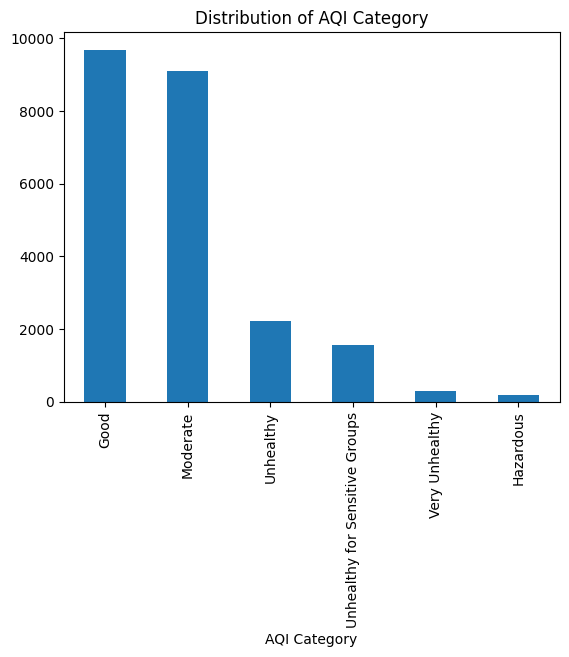

In [27]:
# Distribution of AQI Categories
data['AQI Category'].value_counts().plot.bar()
plt.title('Distribution of AQI Category')
plt.show()

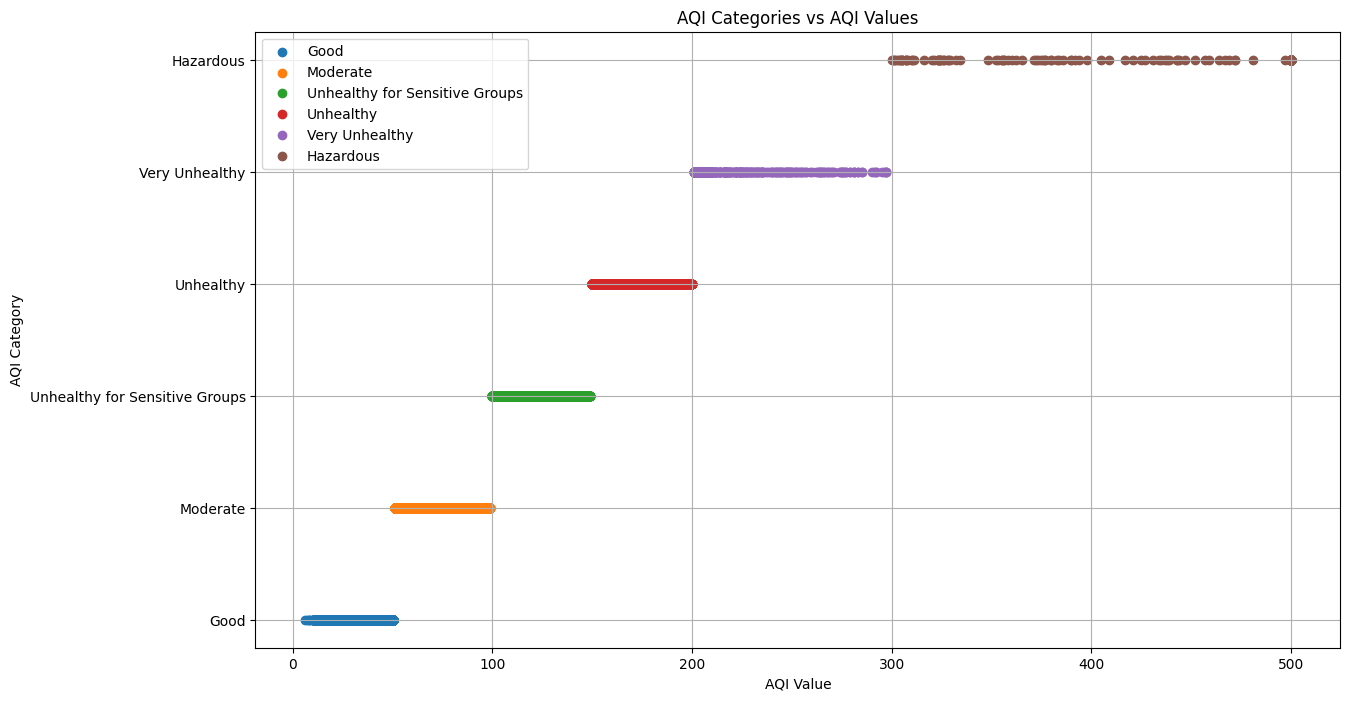

In [28]:
# Scatter plot
data = data.sort_values('AQI Value')

plt.figure(figsize=(14, 8))
for category in data['AQI Category'].unique():
    subset = data[data['AQI Category'] == category]
    plt.scatter(subset['AQI Value'], [category] * len(subset), label=category)

plt.xlabel('AQI Value')
plt.ylabel('AQI Category')
plt.title('AQI Categories vs AQI Values')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
categories = data['AQI Category'].unique()
for category in categories:
    min_value = data[data['AQI Category'] == category]['AQI Value'].min()
    max_value = data[data['AQI Category'] == category]['AQI Value'].max()
    print(f"{category}: Min AQI = {min_value}, Max AQI = {max_value}")

Good: Min AQI = 6, Max AQI = 50
Moderate: Min AQI = 51, Max AQI = 99
Unhealthy for Sensitive Groups: Min AQI = 100, Max AQI = 149
Unhealthy: Min AQI = 150, Max AQI = 200
Very Unhealthy: Min AQI = 201, Max AQI = 297
Hazardous: Min AQI = 300, Max AQI = 500


**In summary:**

Good Air Quality: An AQI value of 50 or below indicates good air quality.

Unhealthy Air Quality: When the AQI exceeds 100, the air quality becomes unhealthy, posing a greater health risk.

Breakdown of cities by air quality:


*   Good Air Quality: 9,688 cities
*   Moderate Air Quality: 9,087 cities
*   Unhealthy Air Quality: 2,215 cities
*   Very Unhealthy Air Quality: 286 cities
*   Hazardous Air Quality: 191 cities








In [30]:
maximum=data[data['AQI Value']==data['AQI Value'].max()]
maximum

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
14175,India,Khairabad,500,Hazardous,1,Good,56,Moderate,1,Good,403,Hazardous
8832,India,Niwari,500,Hazardous,1,Good,46,Good,2,Good,492,Hazardous
10926,India,Tikri,500,Hazardous,3,Good,47,Good,9,Good,500,Hazardous
10866,India,Bhadra,500,Hazardous,1,Good,40,Good,0,Good,500,Hazardous
14813,India,Patiala,500,Hazardous,1,Good,64,Moderate,1,Good,460,Hazardous
...,...,...,...,...,...,...,...,...,...,...,...,...
2502,India,Jodhpur,500,Hazardous,0,Good,34,Good,0,Good,378,Hazardous
19635,India,Moradabad,500,Hazardous,1,Good,69,Moderate,1,Good,500,Hazardous
21009,India,Sunam,500,Hazardous,1,Good,47,Good,0,Good,452,Hazardous
21639,India,Jhunjhunun,500,Hazardous,1,Good,38,Good,0,Good,433,Hazardous


In [31]:
maximum['Country'].value_counts()

,count
Country,
India,95
Pakistan,5
Russian Federation,1
United States of America,1
South Africa,1


<Axes: xlabel='Country'>

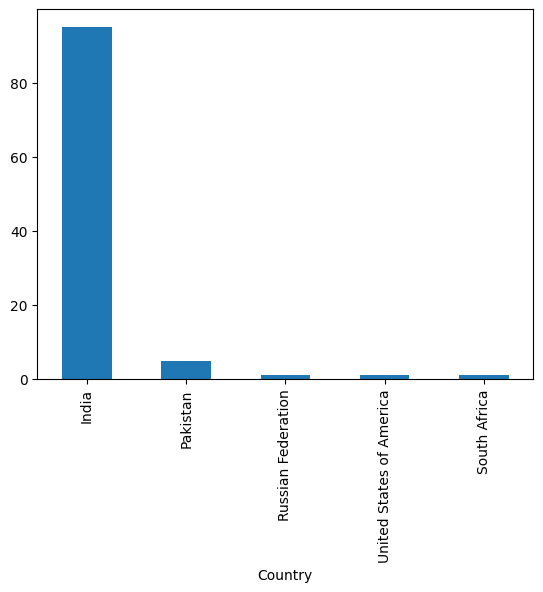

In [32]:
maximum['Country'].value_counts().plot.bar()

In [33]:
Good_AQI=data[data['AQI Value'] <=50]
Good_AQI

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
512,Bolivia (Plurinational State of),El Torno,6,Good,0,Good,5,Good,0,Good,6,Good
9194,Ecuador,Macas,7,Good,1,Good,7,Good,0,Good,7,Good
23269,Papua New Guinea,Tari,8,Good,0,Good,8,Good,0,Good,7,Good
14502,Ecuador,Azogues,8,Good,0,Good,7,Good,0,Good,8,Good
7486,Peru,Huaraz,9,Good,0,Good,9,Good,0,Good,8,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
6812,Thailand,Ban Mo,50,Good,0,Good,28,Good,0,Good,50,Good
13960,India,Hubli,50,Good,0,Good,23,Good,0,Good,50,Good
22213,Ireland,Carlow,50,Good,1,Good,42,Good,0,Good,50,Good
3389,Sri Lanka,Jaffna,50,Good,0,Good,25,Good,0,Good,50,Good


In [34]:
Good_AQI['Country'].value_counts()

,count
Country,
Brazil,1125
Russian Federation,1025
United States of America,1001
Germany,717
Japan,432
...,...
Palau,1
Senegal,1
Vanuatu,1


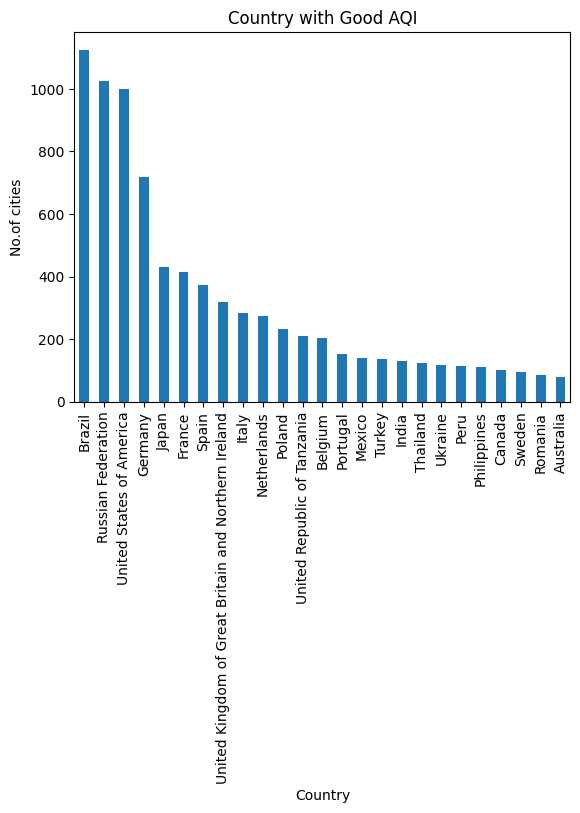

In [35]:
Good_AQI['Country'].value_counts().head(25).plot.bar()
plt.title('Country with Good AQI')
plt.ylabel('No.of cities')
plt.show()

**To sum up:**

* Cities with Maximum AQI (500): 103 cities have the maximum AQI value of 500.

* Of these, 95 cities are in India, 5 in Pakistan, and 1 each in the United States, South Africa, and the Russian Federation.

**Cities with Good Air Quality:**

* Brazil leads with 1125 cities having good air quality.
* Russian Federation ranks second.
* The United States and Germany are in third and fourth place, respectively.

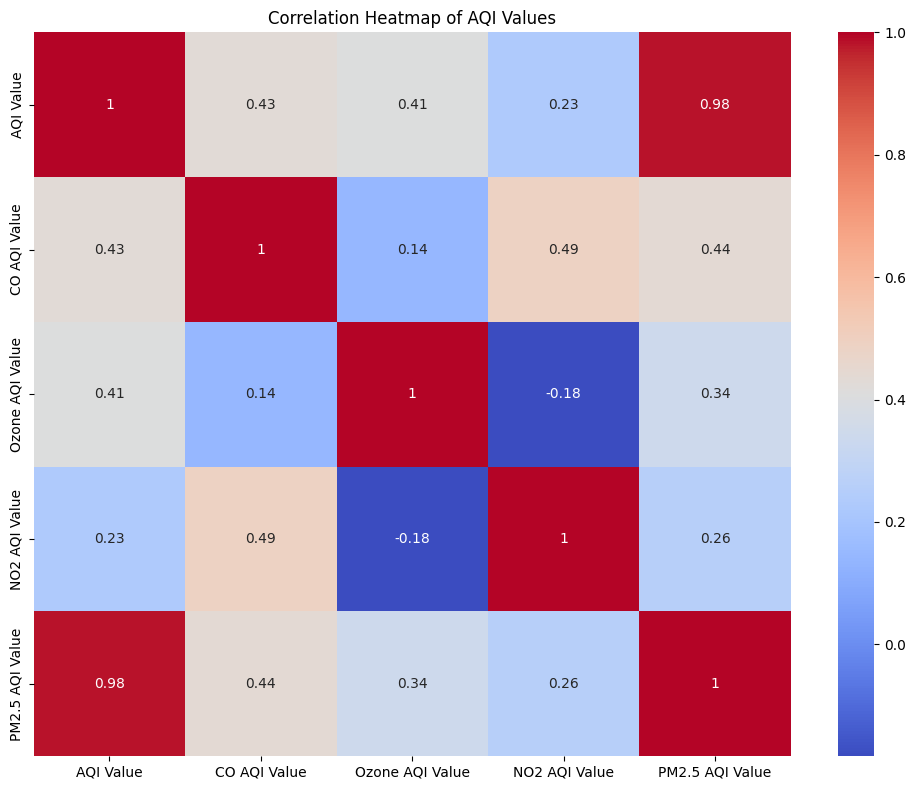

In [36]:
# Correlation heatmap for numerical features
numeric_columns = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
correlation_matrix = data[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of AQI Values')
plt.tight_layout()
plt.show()

1. PM2.5 is the strongest contributor to AQI (correlation: 0.98).
2. CO has a moderate impact on AQI (correlation: 0.43).
3. Ozone and NO2 have weaker correlations with AQI (0.41 and 0.23, respectively).
4. Ozone and NO2 show an inverse relationship (correlation: -0.18).
5. PM2.5 dominates AQI, while other pollutants have a smaller influence.

#Data Preprocessing

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23035 entries, 512 to 18585
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23035 non-null  object
 1   City                23035 non-null  object
 2   AQI Value           23035 non-null  int64 
 3   AQI Category        23035 non-null  object
 4   CO AQI Value        23035 non-null  int64 
 5   CO AQI Category     23035 non-null  object
 6   Ozone AQI Value     23035 non-null  int64 
 7   Ozone AQI Category  23035 non-null  object
 8   NO2 AQI Value       23035 non-null  int64 
 9   NO2 AQI Category    23035 non-null  object
 10  PM2.5 AQI Value     23035 non-null  int64 
 11  PM2.5 AQI Category  23035 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.3+ MB


In [37]:
data.head(10)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
512,Bolivia (Plurinational State of),El Torno,6,Good,0,Good,5,Good,0,Good,6,Good
9194,Ecuador,Macas,7,Good,1,Good,7,Good,0,Good,7,Good
23269,Papua New Guinea,Tari,8,Good,0,Good,8,Good,0,Good,7,Good
14502,Ecuador,Azogues,8,Good,0,Good,7,Good,0,Good,8,Good
7486,Peru,Huaraz,9,Good,0,Good,9,Good,0,Good,8,Good
9607,Indonesia,Manokwari,10,Good,0,Good,10,Good,0,Good,10,Good
3564,Ecuador,Nueva Loja,10,Good,1,Good,5,Good,0,Good,10,Good
11769,Colombia,Puerto Asis,10,Good,1,Good,4,Good,0,Good,10,Good
7792,Peru,Huancavelica,10,Good,0,Good,2,Good,1,Good,10,Good
15578,Peru,Junin,10,Good,0,Good,6,Good,1,Good,10,Good


In [38]:
data.shape

(23035, 12)

In [39]:
from sklearn.preprocessing import LabelEncoder


le_country = LabelEncoder()
le_city = LabelEncoder()
le_co_aqi_category = LabelEncoder()
le_ozone_aqi_category = LabelEncoder()
le_no2_aqi_category = LabelEncoder()
le_pm25_aqi_category = LabelEncoder()

data['Country'] = le_country.fit_transform(data['Country'])
data['City'] = le_city.fit_transform(data['City'])
data['CO AQI Category'] = le_co_aqi_category.fit_transform(data['CO AQI Category'])
data['Ozone AQI Category'] = le_ozone_aqi_category.fit_transform(data['Ozone AQI Category'])
data['NO2 AQI Category'] = le_no2_aqi_category.fit_transform(data['NO2 AQI Category'])
data['PM2.5 AQI Category'] = le_pm25_aqi_category.fit_transform(data['PM2.5 AQI Category'])


# target variable 'AQI Category'
le_category = LabelEncoder()
data['AQI Category'] = le_category.fit_transform(data['AQI Category'])




In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23035 entries, 512 to 18585
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Country             23035 non-null  int64
 1   City                23035 non-null  int64
 2   AQI Value           23035 non-null  int64
 3   AQI Category        23035 non-null  int64
 4   CO AQI Value        23035 non-null  int64
 5   CO AQI Category     23035 non-null  int64
 6   Ozone AQI Value     23035 non-null  int64
 7   Ozone AQI Category  23035 non-null  int64
 8   NO2 AQI Value       23035 non-null  int64
 9   NO2 AQI Category    23035 non-null  int64
 10  PM2.5 AQI Value     23035 non-null  int64
 11  PM2.5 AQI Category  23035 non-null  int64
dtypes: int64(12)
memory usage: 2.3 MB


In [41]:
data["AQI Category"].value_counts()

,count
AQI Category,
0,9688
2,9087
3,2215
4,1568
5,286
1,191


In [42]:
# Saving mapping for future reference
country_mapping = dict(zip(le_country.classes_, le_country.transform(le_country.classes_)))
city_mapping = dict(zip(le_city.classes_, le_city.transform(le_city.classes_)))
#category_mapping = dict(zip(le_category.classes_, le_category.transform(le_category.classes_)))
co_aqi_category_mapping = dict(zip(le_co_aqi_category.classes_, le_co_aqi_category.transform(le_co_aqi_category.classes_)))
ozone_aqi_category_mapping = dict(zip(le_ozone_aqi_category.classes_, le_ozone_aqi_category.transform(le_ozone_aqi_category.classes_)))
no2_aqi_category_mapping = dict(zip(le_no2_aqi_category.classes_, le_no2_aqi_category.transform(le_no2_aqi_category.classes_)))
pm25_aqi_category_mapping = dict(zip(le_pm25_aqi_category.classes_, le_pm25_aqi_category.transform(le_pm25_aqi_category.classes_)))


print("CO_AQI Category Mapping:", co_aqi_category_mapping)

print("Country Mapping:", country_mapping)


CO_AQI Category Mapping: {'Good': 0, 'Moderate': 1, 'Unhealthy for Sensitive Groups': 2}
Country Mapping: {'Afghanistan': 0, 'Albania': 1, 'Algeria': 2, 'Andorra': 3, 'Angola': 4, 'Argentina': 5, 'Armenia': 6, 'Aruba': 7, 'Australia': 8, 'Austria': 9, 'Azerbaijan': 10, 'Bahrain': 11, 'Bangladesh': 12, 'Barbados': 13, 'Belarus': 14, 'Belgium': 15, 'Belize': 16, 'Benin': 17, 'Bhutan': 18, 'Bolivia (Plurinational State of)': 19, 'Bosnia and Herzegovina': 20, 'Botswana': 21, 'Brazil': 22, 'Bulgaria': 23, 'Burkina Faso': 24, 'Burundi': 25, 'Cabo Verde': 26, 'Cambodia': 27, 'Cameroon': 28, 'Canada': 29, 'Central African Republic': 30, 'Chad': 31, 'Chile': 32, 'China': 33, 'Colombia': 34, 'Comoros': 35, 'Congo': 36, 'Costa Rica': 37, 'Croatia': 38, 'Cuba': 39, 'Cyprus': 40, 'Czechia': 41, "Côte d'Ivoire": 42, 'Democratic Republic of the Congo': 43, 'Denmark': 44, 'Dominican Republic': 45, 'Ecuador': 46, 'Egypt': 47, 'El Salvador': 48, 'Equatorial Guinea': 49, 'Eritrea': 50, 'Estonia': 51, 'Et

In [36]:
import pickle
with open('./drive/MyDrive/Colab Notebooks/Capstone project/country_mapping.pkl', 'wb') as file:
    pickle.dump(country_mapping, file)

In [1]:
# import pickle

# loaded_country_mapping = None

# with open('./drive/MyDrive/Colab Notebooks/Capstone project/country_mapping.pkl', 'rb') as file:
#     loaded_country_mapping = pickle.load(file)



0

In [6]:
list(loaded_country_mapping.keys())

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 'Democratic Republic of the Congo',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran (Islamic Republic of)'

In [43]:
import pickle

with open('./drive/MyDrive/Colab Notebooks/Capstone project/city_mapping.pkl', 'wb') as file:
    pickle.dump(city_mapping, file)


with open('./drive/MyDrive/Colab Notebooks/Capstone project/co_aqi_category_mapping.pkl', 'wb') as file:
    pickle.dump(co_aqi_category_mapping, file)

with open('./drive/MyDrive/Colab Notebooks/Capstone project/ozone_aqi_category_mapping.pkl', 'wb') as file:
    pickle.dump(ozone_aqi_category_mapping, file)

with open('./drive/MyDrive/Colab Notebooks/Capstone project/no2_aqi_category_mapping.pkl', 'wb') as file:
    pickle.dump(no2_aqi_category_mapping, file)

with open('./drive/MyDrive/Colab Notebooks/Capstone project/pm25_aqi_category_mapping.pkl', 'wb') as file:
    pickle.dump(pm25_aqi_category_mapping, file)



# Feature importance analysis

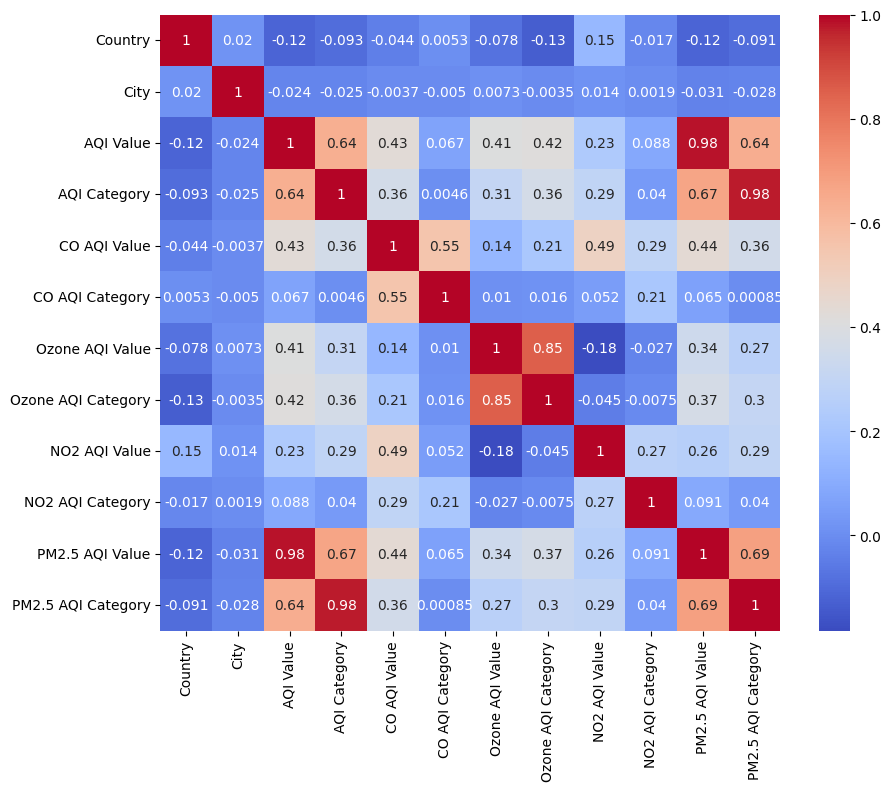

In [45]:

correlation_matrix = data.corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

**Results:**

* PM2.5 AQI is the dominant contributor to overall AQI, with a near-perfect correlation- 0.98.
* CO and ozone AQI values also moderately influence AQI, while NO2 plays a smaller role.
* AQI categories strongly correlate with their respective pollutant values, particularly for PM2.5 and ozone.







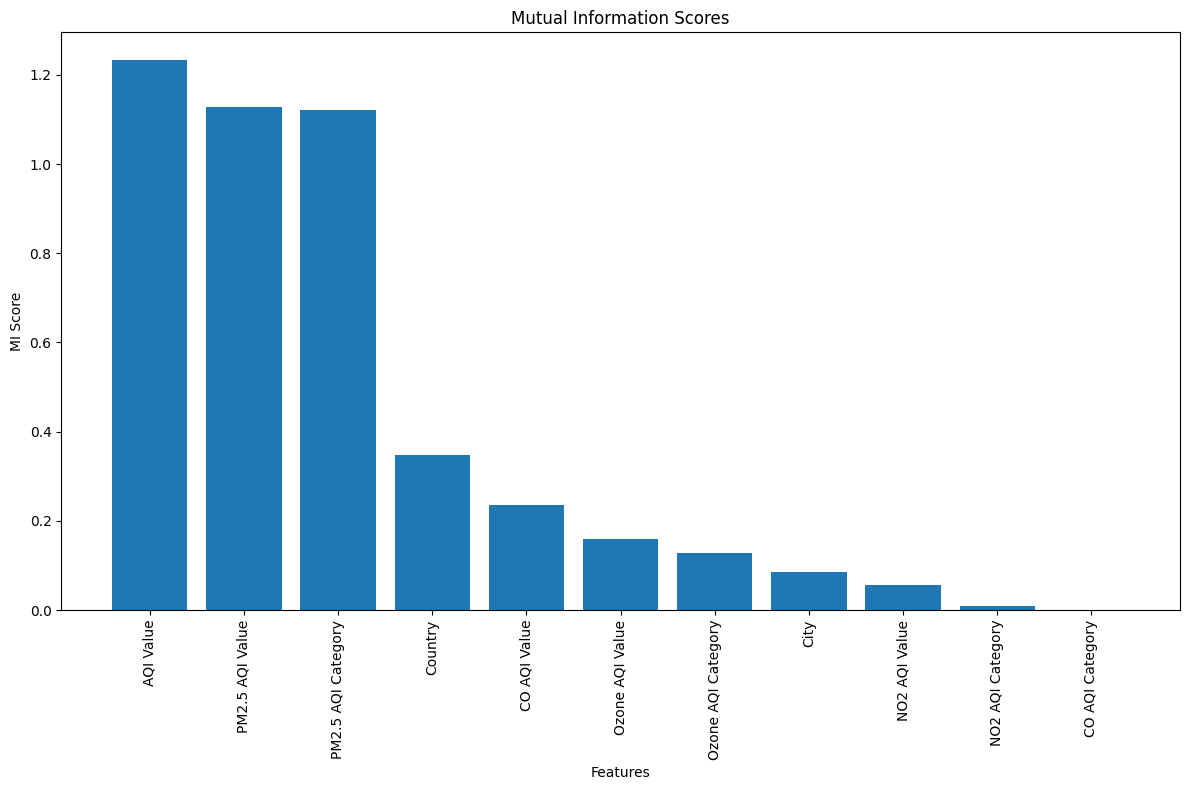

               Feature  MI Score
0            AQI Value  1.233671
1      PM2.5 AQI Value  1.128020
2   PM2.5 AQI Category  1.121665
3              Country  0.346753
4         CO AQI Value  0.236631
5      Ozone AQI Value  0.159051
6   Ozone AQI Category  0.127467
7                 City  0.084582
8        NO2 AQI Value  0.056898
9     NO2 AQI Category  0.008959
10     CO AQI Category  0.000000


In [ ]:
# Mutual Information measures the mutual dependence between two variables( between each feature and the target variable.)


from sklearn.feature_selection import mutual_info_classif



# Separate features and target
X = data.drop('AQI Category', axis=1)
y = data['AQI Category']

# Mutual information scores
mi_scores = mutual_info_classif(X, y)

# Dataframe of features and their MI scores
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_scores_df = mi_scores_df.sort_values('MI Score', ascending=False).reset_index(drop=True)

# Plot
plt.figure(figsize=(12, 8))
plt.bar(mi_scores_df['Feature'], mi_scores_df['MI Score'])
plt.xticks(rotation=90)
plt.title('Mutual Information Scores')
plt.xlabel('Features')
plt.ylabel('MI Score')
plt.tight_layout()
plt.show()

# Print MI scores
print(mi_scores_df)


**Results:**

* AQI Value, PM2.5 AQI Value, and PM2.5 AQI Category have the highest MI scores,- they are the most informative features for predicting the target variable.
* Country and CO AQI Value show moderate importance.
* Features like NO2 AQI Category and CO AQI Category have very low scores(they provide less to no information about the target variable).

In [ ]:
print(X.columns)

Index(['Country', 'City', 'AQI Value', 'CO AQI Value', 'CO AQI Category',
       'Ozone AQI Value', 'Ozone AQI Category', 'NO2 AQI Value',
       'NO2 AQI Category', 'PM2.5 AQI Value', 'PM2.5 AQI Category'],
      dtype='object')


In [ ]:
print(X.shape)

(23035, 11)


In [ ]:
print(y)

512      0
9194     0
23269    0
14502    0
7486     0
        ..
2502     1
19635    1
21009    1
21639    1
18585    1
Name: AQI Category, Length: 23035, dtype: int64


# Model selection and parameter tuning

In [ ]:
# LogisticRegression

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


# Split into train, validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=44)

# Split train+val into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, stratify=y_train_val, random_state=44)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with Grid Search
lr_params = {'C': [0.001, 0.01, 0.1, 1, 2, 5, 10, 100], 'max_iter': [1000, 2000]}
lr_grid = GridSearchCV(LogisticRegression(), lr_params, cv=5, n_jobs=-1, verbose=1)
lr_grid.fit(X_train_scaled, y_train)

print("Best Logistic Regression parameters:", lr_grid.best_params_)

# Evaluation on validation set
val_pred = lr_grid.predict(X_val_scaled)
print("\nValidation Set Results:")
print(classification_report(y_val, val_pred))
print(f"Validation Accuracy: {accuracy_score(y_val, val_pred)}")

# Evaluation on test set
test_pred = lr_grid.predict(X_test_scaled)
print("\nTest Set Results:")
print(classification_report(y_test, test_pred))
print(f"Test Accuracy: {accuracy_score(y_test, test_pred)}")




Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Logistic Regression parameters: {'C': 100, 'max_iter': 1000}

Validation Set Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1550
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00      1454
           3       1.00      1.00      1.00       354
           4       1.00      1.00      1.00       251
           5       1.00      1.00      1.00        46

    accuracy                           1.00      3686
   macro avg       1.00      1.00      1.00      3686
weighted avg       1.00      1.00      1.00      3686

Validation Accuracy: 0.9994574064026045

Test Set Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1938
           1       0.97      1.00      0.99        38
           2       1.00      1.00      1.00      1817
           3       1.00      

In [ ]:
# RandomForest

from sklearn.ensemble import RandomForestClassifier


# Random Forest with Grid Search
rf_params = {
    'n_estimators': [100, 150, 200, 300, 400],
    'max_depth': [None, 10, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 5]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=44), rf_params, cv=5, n_jobs=-1, verbose=1)
rf_grid.fit(X_train_scaled, y_train)

print("Best Random Forest parameters:", rf_grid.best_params_)

# Evaluation on validation set
val_pred = rf_grid.predict(X_val_scaled)
print("\nValidation Set Results:")
print(classification_report(y_val, val_pred))
print(f"Validation Accuracy: {accuracy_score(y_val, val_pred)}")

# Evaluation on test set
test_pred = rf_grid.predict(X_test_scaled)
print("\nTest Set Results:")
print(classification_report(y_test, test_pred))
print(f"Test Accuracy: {accuracy_score(y_test, test_pred)}")

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_grid.best_estimator_.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Best Random Forest parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Validation Set Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1550
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00      1454
           3       1.00      1.00      1.00       354
           4       1.00      1.00      1.00       251
           5       1.00      1.00      1.00        46

    accuracy                           1.00      3686
   macro avg       1.00      1.00      1.00      3686
weighted avg       1.00      1.00      1.00      3686

Validation Accuracy: 0.9997287032013022

Test Set Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1938
           1       1.00      1.00      1.00        38
           2       1.00    

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7479 - loss: 0.7000 - val_accuracy: 0.9273 - val_loss: 0.1778
Epoch 2/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9363 - loss: 0.1692 - val_accuracy: 0.9512 - val_loss: 0.1204
Epoch 3/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9486 - loss: 0.1344 - val_accuracy: 0.9609 - val_loss: 0.0900
Epoch 4/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9580 - loss: 0.1001 - val_accuracy: 0.9550 - val_loss: 0.1178
Epoch 5/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9614 - loss: 0.0922 - val_accuracy: 0.9734 - val_loss: 0.0696
Epoch 6/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9656 - loss: 0.0832 - val_accuracy: 0.9604 - val_loss: 0.0949
Epoch 7/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9707 - loss: 0.0796 - val_accuracy: 0.9786 - val_loss: 0.0626
Epoch 8/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9728 - loss: 0.0686 - val_accuracy

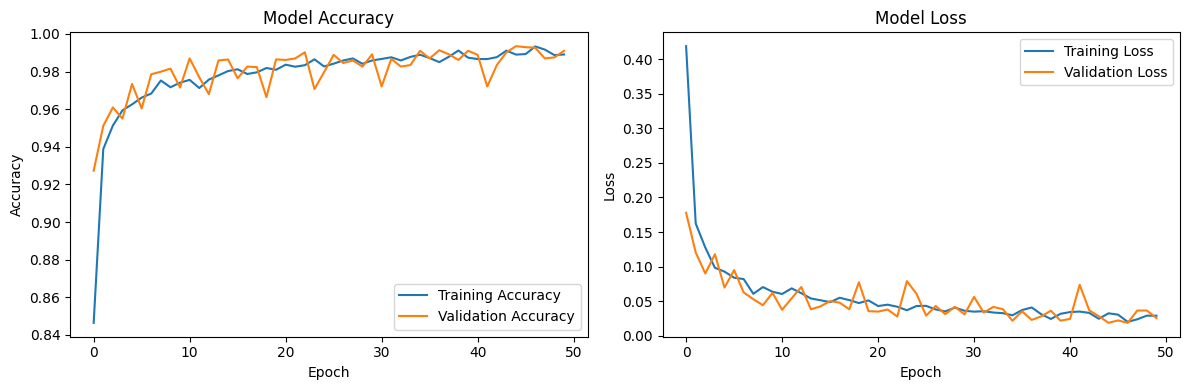

In [ ]:
# CNN

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout


# Reshaping data for CNN (assuming 1D convolution)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_val_reshaped = X_val_scaled.reshape(X_val_scaled.shape[0], X_val_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Defining the CNN model
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Create and compile the model
num_classes = len(np.unique(y_train))
model = create_cnn_model((X_train_scaled.shape[1], 1), num_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model training
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32,
                    validation_data=(X_val_reshaped, y_val), verbose=1)

# Evaluation on validation set
val_pred = model.predict(X_val_reshaped)
val_pred_classes = np.argmax(val_pred, axis=1)
print("\nValidation Set Results:")
print(classification_report(y_val, val_pred_classes))
print(f"Validation Accuracy: {accuracy_score(y_val, val_pred_classes)}")

# Evaluation on test set
test_pred = model.predict(X_test_reshaped)
test_pred_classes = np.argmax(test_pred, axis=1)
print("\nTest Set Results:")
print(classification_report(y_test, test_pred_classes))
print(f"Test Accuracy: {accuracy_score(y_test, test_pred_classes)}")

# Training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


**To summarzie:**

* The Random Forest model emerges as the best-performing model with perfect accuracy (1.0) on both validation and test sets, showing no signs of overfitting.

* Logistic Regression achieves 99.95% validation accuracy and 99.87% test accuracy, with minimal overfitting, while the CNN shows slight overfitting, with validation accuracy (99.10%) higher than test accuracy (98.87%).

* Random Forest's feature importance analysis highlights AQI Value, PM2.5 AQI Value, and PM2.5 AQI Category as the most influential features.

# Save the model

In [ ]:
# Create and train the Random Forest model with best parameters.
# Best Random Forest parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


from sklearn.ensemble import RandomForestClassifier
import pickle


rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)
rf_model.fit(X_train, y_train)

# Save the model to Google Drive in the folder location

save_path = '/content/drive/My Drive/Colab Notebooks/Capstone project/rf_model.pkl'
with open(save_path, 'wb') as file:
    pickle.dump(rf_model, file)

print(f"Model saved to {save_path}")



Model saved to /content/drive/My Drive/Colab Notebooks/Capstone project/rf_model.pkl
